In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/pre_processed_dataset.csv')
df.head(3)

,time,month,day,unit_selling_price_rmb/kg,quantity_sold_kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_basil,item_name_bell pepper,...,item_name_yuganjiao,item_name_yuxingcao,item_name_yuxingcao,item_name_zhimaxiancai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
0,9,1,10,19.8,0.8,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,9,1,19,18.0,0.3,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,1,20,18.0,0.7,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
# import tensorflow as tf

In [4]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((15034, 113), (3759, 113))

In [5]:
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../datasets/testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,time,month,day,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_basil,item_name_bell pepper,...,item_name_yuganjiao,item_name_yuxingcao,item_name_yuxingcao,item_name_zhimaxiancai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
2811,0.3,14,7,10,19.8,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3412,5.9,10,5,19,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1195,0.8,16,1,6,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
import xgboost as xg 

In [7]:
xgmodel = xg.XGBRegressor()
xgmodel.fit(x_train, y_train)
pred = xgmodel.predict(x_test)

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

In [9]:
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))

MAE:  0.3853180205185352
RMSE:  0.6378766109585644


In [10]:
from sklearn.tree import DecisionTreeRegressor 

In [11]:
dtmodel = DecisionTreeRegressor()
dtmodel.fit(x_train, y_train)
pred = dtmodel.predict(x_test)

In [12]:
# Testing set
test_pred = dtmodel.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ', root_mean_squared_error(y_test, pred))

MAE:  0.47262569832402235
RMSE:  0.8806059728898197


In [13]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

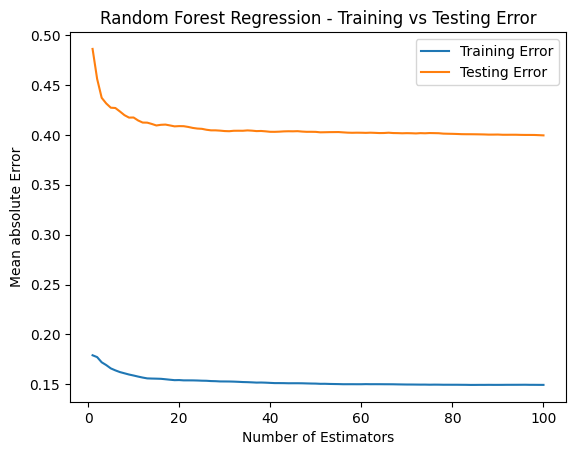

In [14]:
train_errors = []
test_errors = []

for i in range(1, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(1, 101), train_errors, label='Training Error')
plt.plot(range(1, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [15]:
pred = xgmodel.predict(x_test)
pred[:5]

array([0.31792462, 0.27055007, 1.2761148 , 0.33893764, 1.4608239 ],
      dtype=float32)

In [16]:
y_test.head(5)

5709     0.3
9458     0.1
4245     2.0
14105    0.4
5005     1.0
Name: quantity_sold_kg, dtype: float64

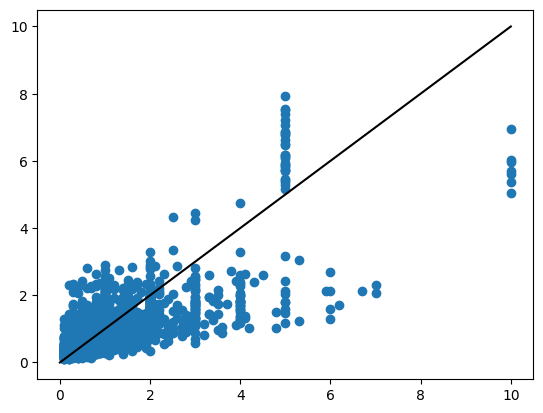

In [17]:
x = [0 , 10]
y = x

plt.scatter(y_test, pred)
plt.plot(x, y, color='black')

In [18]:
# save the model
import pickle
with open('../models/xg_model.pickle', 'wb') as file:
    pickle.dump(xgmodel, file)